In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path
import time
# creating a known Parameter

weight = 0.7
bias = 0.3

# Creating

start = 0
end = 1
stape = 0.01

X = torch.arange(start, end, stape)
Y = weight*X + bias
torch.randn(1)

tensor([1.0966])

In [3]:
# splitting data into training and test sets
train_split = int(len(X)*0.8)
x_train, y_train =  X[:train_split], Y[:train_split]
x_test,  y_test = X[train_split:], Y[train_split:]


In [4]:
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter((torch.randn(1, requires_grad=True)))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias


In [5]:
# creating a random seed
torch.manual_seed(-12)

model_0 = SimpleModel()
# checking out parameters

list(model_0.parameters())


[Parameter containing:
 tensor([-0.4094], requires_grad=True),
 Parameter containing:
 tensor([1.2273], requires_grad=True)]

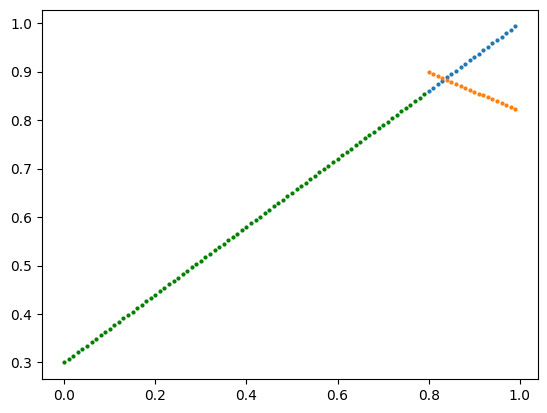

In [6]:
plt.scatter(x_train, y_train, color="green", s=4)
plt.scatter(x_test, y_test, s=4)
# detach is used for removing computation Graph from Tensor
# meaning is just removing requires_grad
plt.scatter(x_test, model_0(x_test).detach().numpy(), s=4)


# using ***inference_mode()***
##### it turns off all those modes which are
##### required ---only--- during training time.

## example
```Python
with torch.inference_mode():
    print("in this block any task done will avoid task that is not used during training")
```


In [7]:
# example
with torch.inference_mode():
    y_predict = model_0(x_test)
y_predict

tensor([0.8998, 0.8957, 0.8916, 0.8875, 0.8834, 0.8793, 0.8752, 0.8711, 0.8670,
        0.8629, 0.8589, 0.8548, 0.8507, 0.8466, 0.8425, 0.8384, 0.8343, 0.8302,
        0.8261, 0.8220])

In [8]:
# # setup loss function
# loss_fn = nn.L1Loss()
# loss_fn(y_predict, x_test)
#
# print(loss_fn(y_predict, y_test))
# # setup Optimizer (stochastic gradient descent)
# optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
# # loss_fn(model_0(x_test), y_test)
#
# print(loss_fn(model_0(x_test), y_test))


### there are total 6 steps of training the model
####  0. Looping through the data
##### -----setting the model to the training mode
####  1. Forward pass
##### -----Meaning predicting the result on current given model
```Python
y_pred = model_0(x_train)
```
###   2. Calculating the loss
##### -----Loss can be calculated via any method based on requirement of the model
```Python
loss = loss_fn(y_pred,y_test)
```
###   3. Optimizer zero grad
#### -----It Optimizes gradient
```Python
optimizer.zero_grad()
```
###   4. perform backPropagation on the loss with respect to the parameters of the model
```Python
loss.backwaed()
```
###   5. step the optimizer perform gradient descent
```Python
optimizer.step()
```


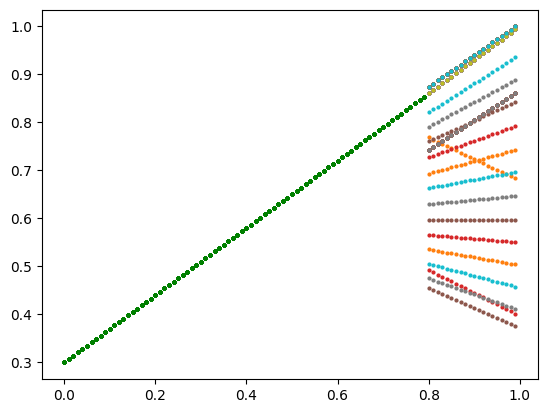

In [9]:
epochs = 200
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)
for epoch in range(epochs):
    # we are using model_0.train to bring back all the parameters in to gradient mode
    # meaning if it was sated in inference mode.
    model_0.train()
    # the below code starts predicting the model
    y_predict = model_0(x_train)
    # for calculating the loss
    loss = loss_fn(y_predict, y_train)
    # it optimizes the model with zero grad
    optimizer.zero_grad()
    # loss.backward does back
    loss.backward()

    optimizer.step()
    model_0.eval()

    if epoch%5 == 0:
        plt.scatter(x_train, y_train, color="green", s=4)
        plt.scatter(x_test, y_test, s=4)
        # detach is used for removing computation Graph from Tensor
        # meaning is just removing requires_grad
        plt.scatter(x_test, model_0(x_test).detach().numpy(), s=4)



In [10]:
## this shows State dict of model
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6610])), ('bias', tensor([0.3448]))])


In [13]:
# now let save trained model to use
# 1. Create model Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok=True)

# 2. Creating Model Save path
#    .pth or .pt is extension for PyTorch Model file.
MODEL_NAME = "model_0.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f = MODEL_SAVE_PATH)


## Now It's time for using saved model